아래 사항을 구하시오.

(1) 평균이 10이고, 분산이 1인 정규분포를 따르는 난수(random number) 를 50개 생성하시오.

(2) 생성된 난수를 이용하여, histogram 을 그리시오.

(3) 생성된 난수를 이용하여, 모평균이 10인지 검정하시오.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

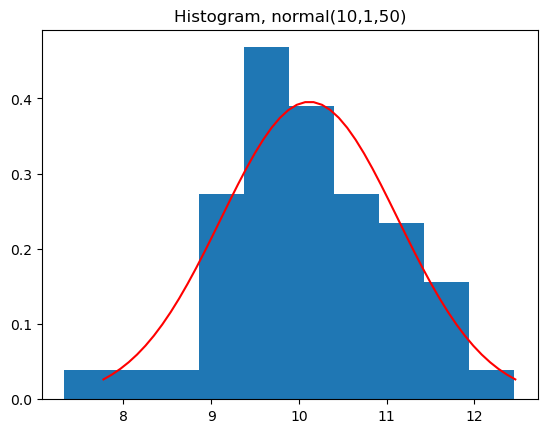

In [54]:
np.random.seed(9)

xs = norm.rvs(loc=10,scale=1,size=50) # 평균이 10, 분산이 1인 정규분포를 따르는 난수 50개

x_axis = np.linspace(norm.ppf(0.01, loc = np.mean(xs), scale=np.std(xs, ddof=1)),
                     norm.ppf(0.99, loc=np.mean(xs), scale=np.std(xs,ddof=1)))


plt.hist(xs, bins=10, density=True) # 구간을 10개로 나눔 
plt.plot(x_axis, norm.pdf(x_axis, loc=np.mean(xs), scale=np.std(xs, ddof=1)), color='red')
plt.title("Histogram : normal(10,1,50)")
plt.show()

In [70]:
from scipy.stats import ttest_1samp

# (1) 귀무가설 설정, H0 : 모평균 = 10
# (2) 대립가설 H1 : 표본평균 != 모평균(10) 
# (3) T값 구하기 t = 표본평균 - 모평균 / (표본분산/sqrt(표본개수))
# 정규분포 그리고, p-value가 기각인지 채택인지 확인하고, 의사결정 
# 여기서는 ttest_1samp로 쉽게 구한다.

alpha = 0.05
t_stat, p_value = ttest_1samp(xs, popmean=10, alternative='two-sided')

print(f"p-value: {p_value:.4f}이므로 ", end="")
if p_value < alpha:
    print(f"유의수준 {alpha}에서 귀무가설을 기각한다.")
else:
    print(f"유의수준 {alpha}에서 귀무가설을 기각할 수 없다.")


p-value: 0.4081이므로 유의수준 0.05에서 귀무가설을 기각할 수 없다.
